In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

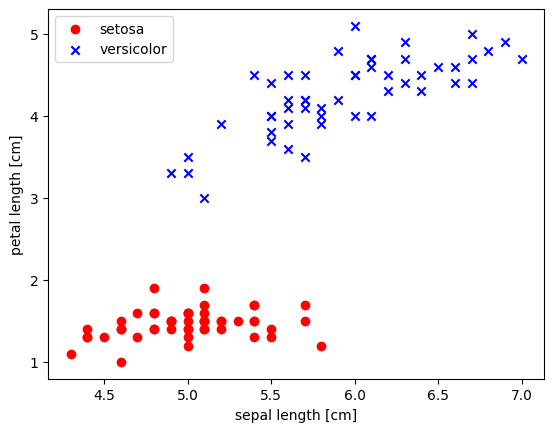

In [9]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In [10]:
class Perceptron(object):
   def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

def fit(self, X, y):
  rgen = np.random.RandomState(self.random_state)
  self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
  self.errors_ = []
  for _ in range(self.n_iter):
    errors = 0
    for xi, target in zip(X, y):
      update = self.eta * (target - self.predict(xi))
      self.w_[1:] += update * xi
      self.w_[0] += update
      errors += int(update != 0.0)
      self.errors_.append(errors)
      return self
def net_input(self, X):
   return np.dot(X, self.w_[1:]) + self.w_[0]
def predict(self, X):
  return np.where(self.net_input(X) >= 0.0, 1, -1)

In [11]:
from sklearn.linear_model import Perceptron

In [12]:
class Perceptron(object):
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

ppn = Perceptron(eta=0.1, n_iter=10)

In [13]:
print(type(ppn))

<class '__main__.Perceptron'>


In [14]:
!pip install scikit-learn

In [15]:
from sklearn.linear_model import Perceptron

In [16]:
ppn = Perceptron()

In [17]:
print(y.shape)
print(np.unique(y))

(100,)
[-1  1]


In [18]:
!pip install scikit-learn
import sklearn
from sklearn.linear_model import Perceptron
import numpy as np

In [19]:
print(y.shape)
print(y.shape)

(100,)
(100,)


In [21]:
ppn.fit(X, y)

Perceptron()

In [22]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')

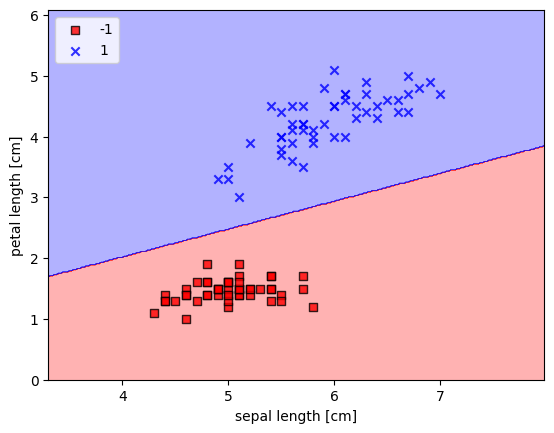

In [23]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()